In [16]:
# import dependencies
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
import re
import pickle

In [3]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")
genome_tags = pd.read_csv("genome_tags.csv")
genome_scores = pd.read_csv("genome_scores.csv")

In [5]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

62423 unique movies in movies.csv
59047 unique movies in ratings.csv
45251 unique movies in tags.csv


In [6]:
print("{} unique users in ratings.csv".format(len(ratings.userId.unique())))

162541 unique users in ratings.csv


In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [8]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [9]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [11]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [12]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
tags

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


In [14]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [15]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [17]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [18]:
genome_tags.dtypes

tagId     int64
tag      object
dtype: object

In [19]:
genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

In [20]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [21]:
genome_scores.dtypes

movieId        int64
tagId          int64
relevance    float64
dtype: object

In [22]:
genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [23]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [24]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [25]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [26]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()

In [27]:
print('number of users: {}\nnumber of movies: {}'.format(n_users, n_movies))

number of users: 162541
number of movies: 59047


In [28]:
movie_summary = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())

In [29]:
movie_summary['ratings_count'] = ratings.groupby('movieId')['rating'].count()

In [30]:
movie_summary.head()

,rating,ratings_count
movieId,,
1,3.893708,57309
2,3.251527,24228
3,3.142028,11804
4,2.853547,2523
5,3.058434,11714


In [31]:
movie_summary['ratings_count'].describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: ratings_count, dtype: float64

In [32]:
movies = pd.merge(movies, movie_summary, left_on="movieId", right_index=True)

In [36]:
movies.head(5)

,movieId,title,genres,rating,ratings_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714


In [37]:
movies[movies['ratings_count'] > 100].sort_values("rating", ascending=False)

,movieId,title,genres,rating,ratings_count
45741,171011,Planet Earth II (2016),Documentary,4.483096,1124
40597,159817,Planet Earth (2006),Documentary,4.464797,1747
314,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482
45593,170705,Band of Brothers (2001),Action|Drama|War,4.398599,1356
45973,171495,Cosmos,(no genres listed),4.326715,277
...,...,...,...,...,...
12618,61348,Disaster Movie (2008),Comedy,1.205566,557
1740,1826,Barney's Great Adventure (1998),Adventure|Children,1.195214,397
4669,4775,Glitter (2001),Drama|Musical|Romance,1.125561,669
6360,6483,From Justin to Kelly (2003),Musical|Romance,1.027578,417


<Axes: xlabel='rating count', ylabel='#'>

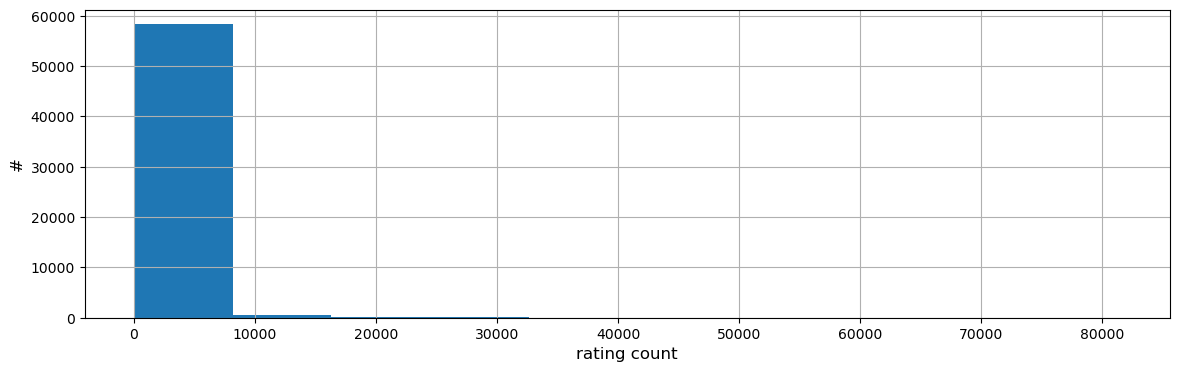

In [38]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('#', fontsize=12)
movie_summary['ratings_count'].hist()

<Axes: xlabel='rating count', ylabel='#'>

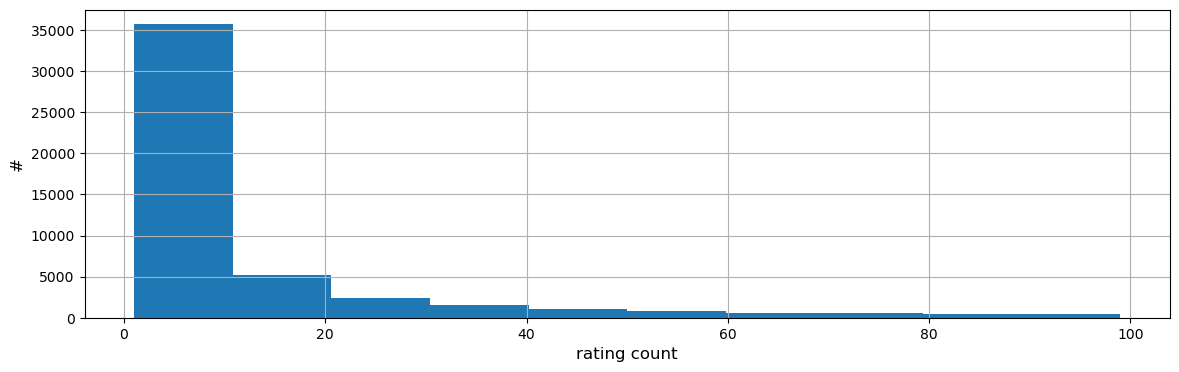

In [39]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('#', fontsize=12)
movie_summary[movie_summary['ratings_count'] < 100]['ratings_count'].hist()

In [40]:
print("Movies with less than 100 ratings:")
print((movie_summary['ratings_count'] < 100).sum())

Movies with less than 100 ratings:
48721


<Axes: xlabel='rating count', ylabel='#'>

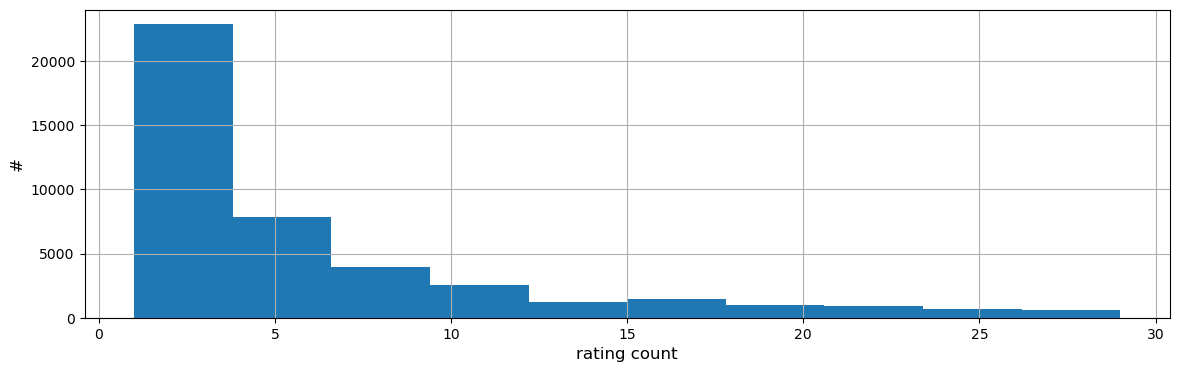

In [41]:
plt.figure(figsize=(14,4))
plt.xlabel('rating count', fontsize=12)
plt.ylabel('#', fontsize=12)
movie_summary[movie_summary['ratings_count'] < 30]['ratings_count'].hist()

In [42]:
print('num movies with 0 ratings = {}'.format((movie_summary['ratings_count'] == 0).sum()))
print('num movies with 1 rating  = {}'.format((movie_summary['ratings_count'] == 1).sum()))
print('num movies with < 10 rating  = {}'.format((movie_summary['ratings_count'] < 10).sum()))
print('num movies with < 20 rating  = {}'.format((movie_summary['ratings_count'] < 20).sum()))
print('num movies with < 30 rating  = {}'.format((movie_summary['ratings_count'] < 30).sum()))
print('num movies with < 50 rating  = {}'.format((movie_summary['ratings_count'] < 50).sum()))

num movies with 0 ratings = 0
num movies with 1 rating  = 10298
num movies with < 10 rating  = 34717
num movies with < 20 rating  = 40617
num movies with < 30 rating  = 43132
num movies with < 50 rating  = 45871


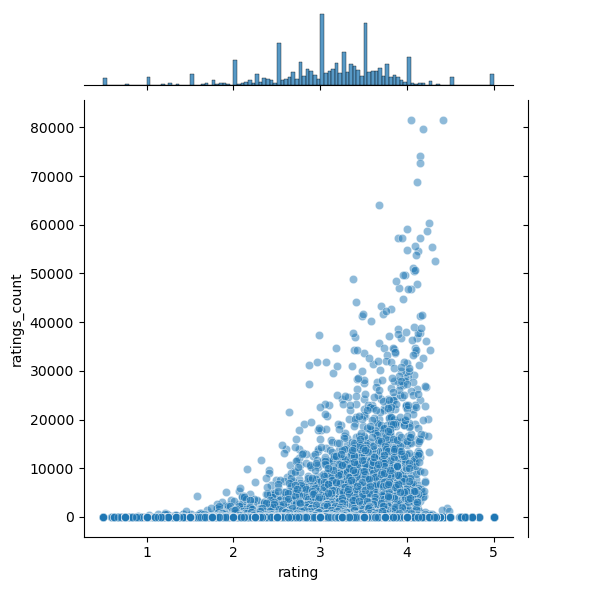

In [43]:
sns.jointplot(x='rating', y='ratings_count', data=movie_summary, alpha=0.5, height=6)

In [45]:



# Group the 'ratings' DataFrame by 'userId' and aggregate the 'rating' column using 'count' and 'mean' functions
users_ratings = (
    ratings
    .groupby('userId', as_index=False)
    .agg({'rating': ['count', 'mean']})
)

# Flatten the multi-level columns in the 'users_ratings' DataFrame
users_ratings.columns = users_ratings.columns.map('_'.join).str.rstrip('_')

# Now, you can use the 'users_ratings' DataFrame with the flattened columns
print(users_ratings)

        userId  rating_count  rating_mean
0            1            70     3.814286
1            2           184     3.630435
2            3           656     3.697409
3            4           242     3.378099
4            5           101     3.752475
...        ...           ...          ...
162536  162537           101     4.039604
162537  162538           154     3.415584
162538  162539            47     4.510638
162539  162540            88     3.829545
162540  162541           182     3.365385

[162541 rows x 3 columns]


In [46]:
users_ratings.head()

,userId,rating_count,rating_mean
0,1,70,3.814286
1,2,184,3.630435
2,3,656,3.697409
3,4,242,3.378099
4,5,101,3.752475


In [47]:
users_ratings.describe()

,userId,rating_count,rating_mean
count,162541.00000,162541.000000,162541.000000
mean,81271.00000,153.807932,3.679205
std,46921.68939,268.047590,0.477368
min,1.00000,20.000000,0.500000
25%,40636.00000,36.000000,3.398747
50%,81271.00000,71.000000,3.700000
75%,121906.00000,162.000000,4.000000
max,162541.00000,32202.000000,5.000000


<Axes: xlabel='rating_mean', ylabel='rating_count'>

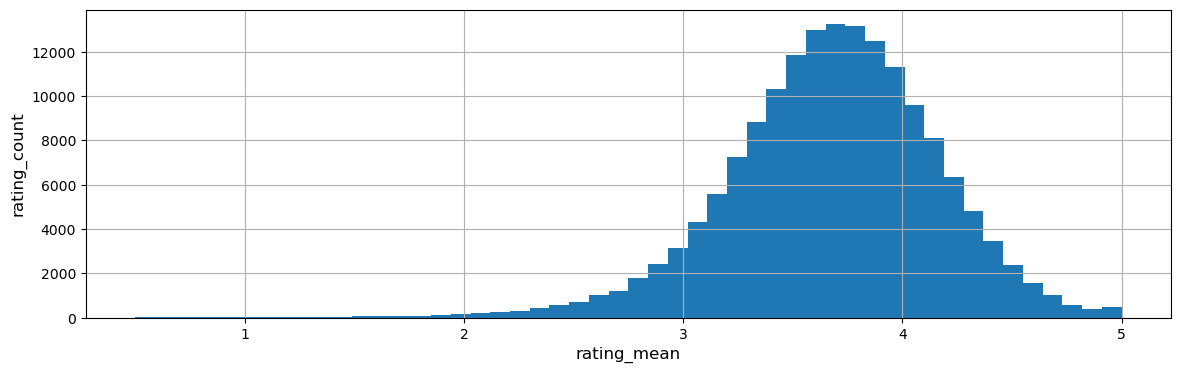

In [50]:
plt.figure(figsize=(14,4))

plt.xlabel('rating_mean', fontsize=12)
plt.ylabel('rating_count', fontsize=12)
users_ratings['rating_mean'].hist(bins=50)

<Axes: xlabel='rating_count', ylabel='rating_count'>

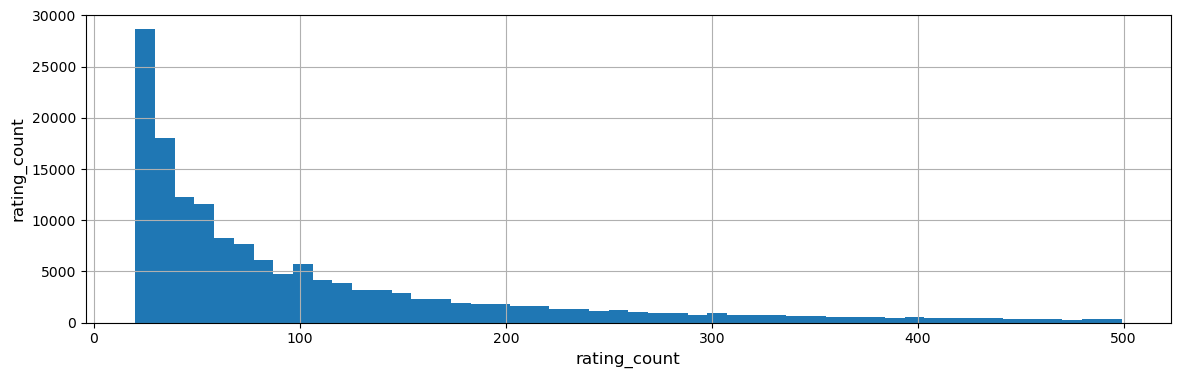

In [51]:
plt.figure(figsize=(14,4))
plt.xlabel('rating_count', fontsize=12)
plt.ylabel('rating_count', fontsize=12)
users_ratings[users_ratings['rating_count'] < 500]['rating_count'].hist(bins=50)

In [55]:
# handle genres (remove all non alphabet characters)
movies['genres'] = movies['genres'].str.replace(pat="|", repl=" ")
movies['genres'] = movies['genres'].str.replace(pat="-", repl="")
movies['genres'] = movies['genres'].str.replace(pat="(no genres listed)", repl="")
movies['genres'] = movies['genres'].str.replace(pat="(", repl="")
movies['genres'] = movies['genres'].str.replace(pat=")", repl="")
movies

/var/folders/wh/dcrmmvwj20v17sfy6sn_5xyr0000gn/T/ipykernel_87832/3501237988.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace(pat="|", repl=" ")
/var/folders/wh/dcrmmvwj20v17sfy6sn_5xyr0000gn/T/ipykernel_87832/3501237988.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['genres'] = movies['genres'].str.replace(pat="(no genres listed)", repl="")
/var/folders/wh/dcrmmvwj20v17sfy6sn_5xyr0000gn/T/ipykernel_87832/3501237988.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace(pat="(", repl="")
/var/folders/wh/dcrmmvwj20v17sfy6s

,movieId,title,genres,rating,ratings_count
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.893708,57309
1,2,Jumanji (1995),Adventure Children Fantasy,3.251527,24228
2,3,Grumpier Old Men (1995),Comedy Romance,3.142028,11804
3,4,Waiting to Exhale (1995),Comedy Drama Romance,2.853547,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714
...,...,...,...,...,...
62418,209157,We (2018),Drama,1.500000,1
62419,209159,Window of the Soul (2001),Documentary,3.000000,1
62420,209163,Bad Poems (2018),Comedy Drama,4.500000,1
62421,209169,A Girl Thing (2001),,3.000000,1


In [56]:
# drop timestamps, not needed
ratings = ratings.drop("timestamp", axis=1)
tags = tags.drop("timestamp", axis=1)

In [57]:
# fill some nans 
tags.fillna("", inplace=True)

In [58]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

59047 unique movies in movies.csv
59047 unique movies in ratings.csv
45251 unique movies in tags.csv


In [59]:
# drop movies with to little reviews
movie_ids_to_remove = movie_summary.loc[movie_summary['ratings_count'] < 10].index
ratings = ratings[~ratings["movieId"].isin(movie_ids_to_remove)]
tags = tags[~tags["movieId"].isin(movie_ids_to_remove)]
movies = movies[~movies["movieId"].isin(movie_ids_to_remove)]
movies.head()

,movieId,title,genres,rating,ratings_count
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.893708,57309
1,2,Jumanji (1995),Adventure Children Fantasy,3.251527,24228
2,3,Grumpier Old Men (1995),Comedy Romance,3.142028,11804
3,4,Waiting to Exhale (1995),Comedy Drama Romance,2.853547,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714


In [60]:
print("{} unique movies in movies.csv".format(len(movies.movieId.unique())))
print("{} unique movies in ratings.csv".format(len(ratings.movieId.unique())))
print("{} unique movies in tags.csv".format(len(tags.movieId.unique())))

24330 unique movies in movies.csv
24330 unique movies in ratings.csv
26178 unique movies in tags.csv
